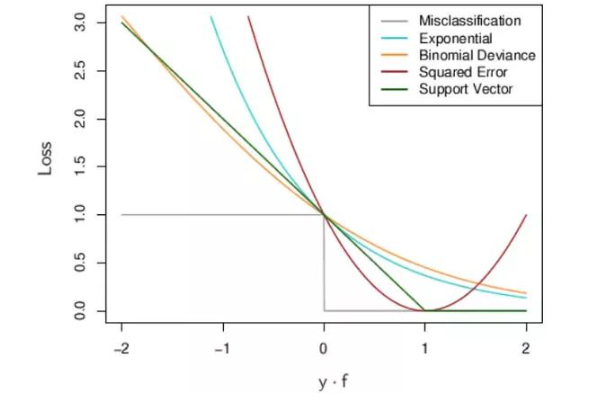

Above is for binary classification where y = 1/-1, f is raw prediction, 
class prediction is sign(f) = 1 if f>0, 0 if f=0 , -1 if f<0

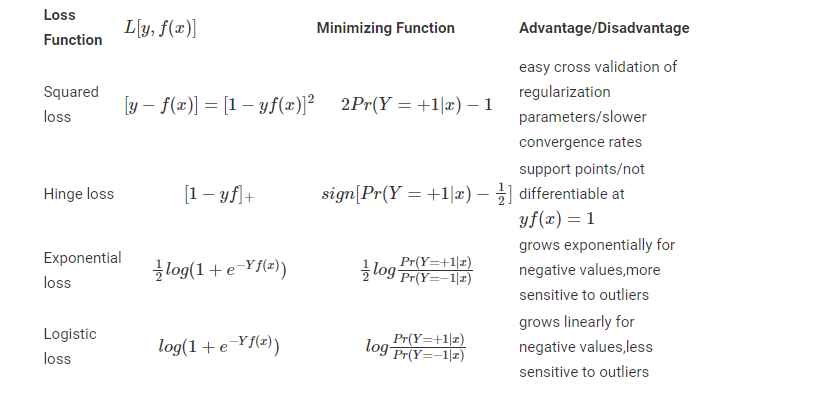

## Similarities between loss functions:



Hinge loss, Exponential loss, Logistic loss have very similar tails, giving zero penalty to points well inside their margin and linear or exponential penalty to points on the wrong side adn far away. Squared error loss gives a quadratic penalty and points inside their own margin have a strong influence on othe model as well.

Exponential loss and Logistic loss have the same asymptotes as the SVM hinge loss but are rounded in the interrior.

## References

1) https://yuan-du.com/post/2020-12-13-loss-functions/decision-theory/
2) https://towardsdatascience.com/what-is-loss-function-1e2605aeb904